# Dash Einführung
Dash ist ein Framework zur Erstellung von Webapps für die Datenvisualisierung, entwickelt von Plotly. Dash zielt darauf ab, dass der User so weit wie möglich in Python arbeiten kann und eignet sich gut dafür, mit Pandas zusammen verwendet zu werden.

In diesem Notebook werden die Grundlagen von Dash anhand von Beispielen vorgestellt. Die offizielle Dokumentation befindet sich hier: 

https://dash.plotly.com/

*Anmerkung: Damit Dash in der Colab-Umgebung richtig funktioniert, sollten JavaScript und Cookies im Browser erlaubt sein.*

In [ ]:
!pip install jupyter-dash
!pip install dash-bootstrap-components

In [ ]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
import dash_table
import plotly.express as px
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import pandas as pd

In [ ]:
# Daten laden
iris = pd.read_csv("https://raw.githubusercontent.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/master/iris.csv")
vendors = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/vendors.csv.xz')
customers = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/customers.csv.xz')
locations = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/locations.csv.xz')
orders = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/orders.csv.xz',
                     parse_dates=['order_accepted_time', 'delivered_time', 'delivery_date'])

## Statische Apps

Mit Dash können sehr aufwändige Oberflächen mit komplexen Graphen, Auswahl- und Filterelementen (z.B. Dropdown-Menüs, Checkboxen, Slider, etc.) und Layouts erstellt werden.

Normalerweise wird Dash als normales Pythonskript ausgeführt, der Zugriff auf die erzeugte Visualisierung erfolgt über den Browser. Innerhalb dieses Notebooks/der Colab-Umgebung greifen wir aber auf JupyterDash zurück, damit die Oberflächen inline angezeigt werden können:

(https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e)

Für den Anfang erstmal eine minimale (Jupyter-)Dash-Anwendung:

In [ ]:
app = JupyterDash(__name__)

# Das Layout wird ähnlich wie in HTML festgelegt
app.layout = html.Div(children=[
    html.H1(children='Hallo'),
    html.Div(children="Hier könnte Ihre Dash App stehen.")
])

# Die JupyterDash-App wird im Notebook selber angezeigt
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Zum Vergleich dieselbe Anwendung in "normalem" Dash:

In [ ]:
app = dash.Dash(__name__)

# Das Layout wird ähnlich wie in HTML festgelegt
app.layout = html.Div(children=[
    html.H1(children='Hallo'),
    html.Div(children="Hier könnte Ihre Dash App stehen.")
])

# Die Anwendung sollte unter standardmäßig unter 
# http://127.0.0.1:8050/ angezeigt werden
if __name__ == '__main__':
    app.run_server(debug=True)

Der Code unterscheidet sich in diesem Beispiel nur in zwei Punkten: Die Erstellung des Dash-Objektes, und der run-Befehl.
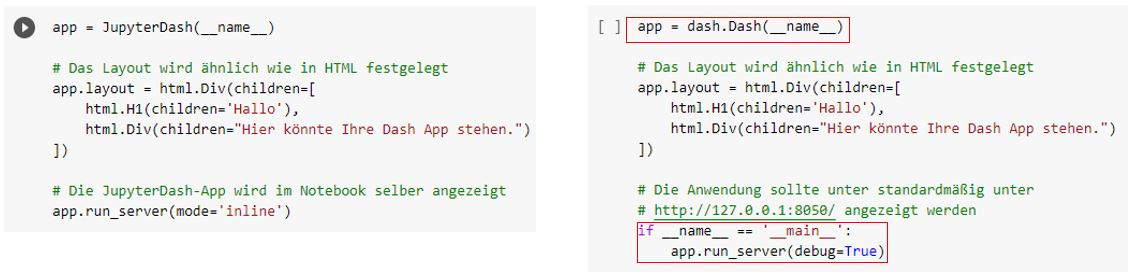

Für das Layout verwenden wir in diesem Notebook **Dash Bootstrap** (https://dash-bootstrap-components.opensource.faculty.ai/). Dies ändert nichts an den Konzepten von Dash, macht den Layout-Code bei etwas komplexeren Beispielen aber deutlich übersichtlicher.

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])


# Das Layout wird ähnlich wie in HTML festgelegt
# Der dbc.Container ist ein Dash-Bootstrap Element
app.layout = app.layout = dbc.Container([
     html.H1("Hallo"),
     html.Div("Hier ist Dash :D")
])

# Die JupyterDash-App wird im Notebook selber angezeigt
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Wir setzen jetzt einen der Iris-Plots aus dem Pandas-Notebook in Dash um. Hierfür verwenden wir das `plotly.express` Modul, oben importiert als `px`. `plotly.express` vereinfacht die Erstellung von simplen Graphen und wird in der Dokumentation empfohlen: https://plotly.com/python/plotly-express/

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
# Scatterplot erzeugen
fig = px.scatter(iris, x="sepal_length", y="sepal_width", color="species")
# Die Minimal- und Maximalwerte der Achsen
fig.update_xaxes(range=[4, 8])
fig.update_yaxes(range=[1.5, 5])

app.layout = dbc.Container(
    [
        html.H1("Iris Data"),
        dcc.Graph(id='iris-graph', figure=fig)
    ]
)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Tooltips für die einzelnen Datenpunkte werden durch Dash automatisch generiert, ebenso wie Legenden (siehe erstes Iris-Beispiel weiter unten) und eine Plot-Toolbar mit Auswahl- und Zoomwerkzeugen (die Ansicht kann mit dem "Autoscale"-Button zurückgesetzt werden).

Auch 3D-Plots können ohne großen Aufwand erstellt werden:

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
# Die Dimension "petal_length" wird nun hinzugefügt
fig = px.scatter_3d(iris, x="sepal_length", y="sepal_width", z="petal_width", color="species")

# Die Achsen müssen bei 3D-Plots etwas anders gesetzt werden, dies ist aber optional
fig.update_layout(
    scene = dict(
        xaxis = dict(range=[4,8]),
        yaxis = dict(range=[1.5, 5]),
        zaxis = dict(range=[0,3])
        )
)

app.layout = dbc.Container(
    [
        html.H1("Iris Data"),
        dcc.Graph(id='iris-graph', figure=fig)
    ]
)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

### Übung

Jetzt zu den Aufgaben für Dich:

1.   Erstelle aus den Restaurant-Daten einen neuen DataFrame mit dem Bestelltdatum als Zeilenindex und den Spalten `revenue` und `total_orders`. `revenue` ist der Gesamtumsatz aller Restaurants zum jeweiligen Datum, `total_orders` die Gesamtzahl aller Bestellungen.
2.    Erstelle einen einfachen Dash-Plot mit obigem DataFrame, mit dem Datum auf der x-Achse und dem Gesamtumsatz auf der y-Achse.




In [ ]:
# Platz für Deine Übungen :)

### Lösung

In [ ]:
# 1. DataFrame erstellen
restaurant_df = orders[['delivery_date', 'grand_total']].groupby('delivery_date').agg(revenue=('grand_total', 'sum'), total_orders=('grand_total', 'count'))
restaurant_df

,revenue,total_orders
delivery_date,,
2019-05-31,833.6,45
2019-06-01,3903.3,203
2019-06-02,3168.1,185
2019-06-03,3048.1,180
2019-06-04,4208.4,246
...,...,...
2020-03-20,35.9,4
2020-03-21,66.1,6
2020-03-24,12.2,1


In [ ]:
# 2. Dash-Plot erstellen
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
# Zur Abwechslung mal einen Line-Plot
fig = px.line(restaurant_df, x = restaurant_df.index, y="revenue")

app.layout = dbc.Container(
    [
        html.H1("Restaurant Data"),
        dcc.Graph(id='restaurant-graph', figure=fig)
    ]
)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## Interaktive Apps mit Callbacks
Ein höherer Grad an Interaktion wird in Dash über Callbacks erreicht. Auch hierzu wieder ein Minimalbeispiel:

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Für Callbacks sind die component_ids im Layout wichtig
app.layout = html.Div([
    html.H5("Mit dem Inputfeld kann der Text im Output verändert werden"),
    html.Div(["Input: ",
              dcc.Input(id='my-input', value='Hai :D', type='text')]),
    html.Br(),
    html.Div(id='my-output'),

])

app.layout = dbc.Container(
    [
        html.H6("Mit dem Inputfeld kann der Text im Output verändert werden"),
        dbc.Input(id="my-input", type="text", value="", placeholder="Input"),
        html.Br(),
        html.Div(id="my-output"),
    ]
)

# Der Callback wird immer aufgerufen, sobald sich eine Property des Inputs ändert,
# in diesem Fall mit component_id='my-input' im Layout 
# Der Output wird analog über component_id='my-output' angesprochen
@app.callback(
    Output(component_id='my-output', component_property='children'),
    [Input(component_id='my-input', component_property='value')]
)
def update_output_div(input_value):
    return 'Output: {}'.format(input_value)


app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Das Input-Feld in diesem Beispiel ist Teil der Dash Core Components (https://dash.plotly.com/dash-core-components), ebenso wie `dcc.Graph `, welcher uns in den vorherigen Beispielen bereits begegnet ist.

Mithilfe von Callbacks bauen wir in die Iris-App eine einfache Filtermöglichkeit ein: Ein Dropdown-Menü (ebenfalls aus `dcc`), mit welchem Iris-Spezies ausgewählt werden können.

*Anmerkung: In diesem Beispiel sind die Farben nicht an die Spezies gebunden, d.h. wenn nur eine Spezies ausgewählt wird, wird diese immer in Blau angezeigt. Um den Code halbwegs übersichtlich zu halten, belassen wir das in diesem Notebook so.*

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Liste der Spezies für das Dropdown-Menü erstellen, mit Zusatzoption 'All species'
species_list = ['All species']
species_list.extend(iris['species'].unique())
species_list

# Die Erstellung des Plots an sich kapseln wir zwecks Verwendung im Callback in eine
# eigene Methode
def generate_my_plot(df):
  fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species")
  # Die Minimal- und Maximalwerte der Achsen
  fig.update_xaxes(range=[4, 8])
  fig.update_yaxes(range=[1.5, 5])
  return fig

fig = generate_my_plot(iris)

app.layout = dbc.Container([
     html.H1("Iris Data"),
     dcc.Dropdown(id="species-select", 
                  options=[{"label": i, "value": i} for i in species_list], 
                  value=species_list[0]),
     dcc.Graph(id='iris-graph', figure=fig)
])



# Der Callback wird aufgerufen sobald, sich eine Input-Property ändert
@app.callback(
    Output(component_id='iris-graph', component_property='figure'),
    [Input(component_id='species-select', component_property='value')]
)
def update_graph(input_value):
  if input_value == 'All species':
    iris_updated = iris
  else:
    iris_updated = iris.loc[iris['species']==input_value]
  return generate_my_plot(iris_updated)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

### Mehrere Inputs
Nur nach der Spezies zu filtern ist natürlich zu einfach, deshalb wollen wir zusätzlich nach Blütengrößen filtern können. Zur Abwechslung verwenden wir hierzu Slider-Elemente.

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

species_list = ['All species']
species_list.extend(iris['species'].unique())
species_list

def generate_my_plot(df):
  fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species")
  # Die Minimal- und Maximalwerte der Achsen
  fig.update_xaxes(range=[4, 8])
  fig.update_yaxes(range=[1.5, 5])
  return fig

fig = generate_my_plot(iris)

app.layout = dbc.Container([
      html.H1("Iris Data"),
      dbc.FormGroup([
                    dbc.Label('Species:'),
                    dcc.Dropdown(id="species-select", 
                    options=[{"label": i, "value": i} for i in species_list], 
                    value=species_list[0],)
      ]),
      dbc.FormGroup([
                    dbc.Label('Petal length:'),
                    dcc.RangeSlider(id="petal-length-select", 
                                    count=1,min=1,max=7,step=0.5,
                                    value=[1,7], 
                                    marks={i: '{}'.format(i) for i in range(1,8)}),
      ]),
      dbc.FormGroup([
                    dbc.Label('Petal width:'),
                    dcc.RangeSlider(id="petal-width-select", 
                                    count=1,min=0,max=3,step=0.5,
                                    value=[0, 3], 
                                    marks={i: '{}'.format(i) for i in range(0, 4)})
      ]),
      dcc.Graph(id='iris-graph', figure=fig)
])



# Die zusätzlichen Inputs werden einfach hinzugefügt
@app.callback(
    Output(component_id='iris-graph', component_property='figure'),
    [Input(component_id='species-select', component_property='value'),
     Input(component_id='petal-length-select', component_property='value'),
     Input(component_id='petal-width-select', component_property='value')]
)
def update_graph(species_select, petal_length_select, petal_width_select):
  # Spezies filtern
  if species_select == 'All species':
    iris_updated = iris
  else:
    iris_updated = iris.loc[iris['species']==species_select]
  # Sliderwerte filtern
  iris_updated = iris_updated.loc[iris_updated['petal_length'].between(petal_length_select[0],petal_length_select[1])]
  iris_updated = iris_updated.loc[iris_updated['petal_width'].between(petal_width_select[0],petal_width_select[1])]
  return generate_my_plot(iris_updated)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## Anpassung des Layouts
Das Dropdown-Menü sind momentan etwas groß. Bevor wir unserer App also weitere Elemente hinzufügen, sollten wir das Layout noch ein wenig anpassen. Da wir Dash Bootstrap benutzen, können wir das entsprechende Grid-Layout nutzen, das mit Reihen (`dbc.Row`) und Spalten (`dbc.Col`) arbeitet. 

(https://dash-bootstrap-components.opensource.faculty.ai/docs/components/layout)

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

species_list = ['All species']
species_list.extend(iris['species'].unique())
species_list

def generate_my_plot(df):
  fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species")
  # Die Minimal- und Maximalwerte der Achsen
  fig.update_xaxes(range=[4, 8])
  fig.update_yaxes(range=[1.5, 5])
  return fig

fig = generate_my_plot(iris)

app.layout = dbc.Container([
      html.H1("Iris Data"),
      dbc.Row([
               dbc.Col(dbc.FormGroup([
                  dbc.Label('Species:'),
                  dcc.Dropdown(id="species-select", 
                  options=[{"label": i, "value": i} for i in species_list], 
                  value=species_list[0],)
        	      ]), md=3),
               
               dbc.Col(dbc.FormGroup([
                    dbc.Label('Petal length:'),
                    dcc.RangeSlider(id="petal-length-select", 
                                    count=1,min=1,max=7,step=0.5,
                                    value=[1,7], 
                                    marks={i: '{}'.format(i) for i in range(1,8)}),
               ]), md=4),
               dbc.Col(dbc.FormGroup([
                    dbc.Label('Petal width:'),
                    dcc.RangeSlider(id="petal-width-select", 
                                    count=1,min=0,max=3,step=0.5,
                                    value=[0, 3], 
                                    marks={i: '{}'.format(i) for i in range(0, 4)})
                ]), md=4)
      ]),
      dcc.Graph(id='iris-graph', figure=fig)
])



# Die zusätzlichen Inputs werden einfach hinzugefügt
@app.callback(
    Output(component_id='iris-graph', component_property='figure'),
    [Input(component_id='species-select', component_property='value'),
     Input(component_id='petal-length-select', component_property='value'),
     Input(component_id='petal-width-select', component_property='value')]
)
def update_graph(species_select, petal_length_select, petal_width_select):
  # Spezies filtern
  if species_select == 'All species':
    iris_updated = iris
  else:
    iris_updated = iris.loc[iris['species']==species_select]
  # Sliderwerte filtern
  iris_updated = iris_updated.loc[iris_updated['petal_length'].between(petal_length_select[0],petal_length_select[1])]
  iris_updated = iris_updated.loc[iris_updated['petal_width'].between(petal_width_select[0],petal_width_select[1])]
  return generate_my_plot(iris_updated)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

### Übung
Jetzt zu den Aufgaben für Dich:
1.  Füge zum Restaurant-Plot ein Dropdown-Menü hinzu, so dass die Anzeige auf der y-Achse zwischen dem Umsatz und der Anzahl an Bestellungen umgestellt werden kann.
2.  Passe das Layout an, so dass es dir besser gefällt.
3. Füge einen Slider ein, mit dem dem die Daten zusätzlich nach minimaler und maximaler `delivery_distance` gefiltert werden können.

In [ ]:
# Platz für Deine Übungen :)

### Lösung

In [ ]:
# 1. Dropdown-Menü
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

def generate_my_plot(df, column):
  return px.line(df, x = df.index, y=column)

fig = generate_my_plot(restaurant_df, restaurant_df.columns[0])

app.layout = dbc.Container([
                            html.H1("Restaurant Data"),
                            dcc.Dropdown(id="axes-select",
                                         options=[{"label": i, "value": i} for i in restaurant_df.columns],
                                         value=restaurant_df.columns[0]),
                            dcc.Graph(id='restaurant-graph', figure=fig)
])

@app.callback(
    Output(component_id='restaurant-graph', component_property='figure'),
    [Input(component_id='axes-select', component_property='value')]
)
def update_graph(input_value):
  return generate_my_plot(restaurant_df, input_value)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [ ]:
# 2. Layout
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

def generate_my_plot(df, column):
  return px.line(df, x = df.index, y=column)

fig = generate_my_plot(restaurant_df, restaurant_df.columns[0])

controls = dbc.Card([
                     
], body=True)

app.layout = dbc.Container([
                            html.H1("Restaurant Data"),
                            dbc.Row([
                                     dbc.Col(dbc.FormGroup([
                                                            dbc.Label('x-Axis data:'),
                                                            dcc.Dropdown(id="axes-select",
                                                                         options=[{"label": i, "value": i} for i in restaurant_df.columns],
                                                                         value=restaurant_df.columns[0])
                                      ]), md=4),
                                     ]), 
                            dcc.Graph(id='restaurant-graph', figure=fig)
])    

@app.callback(
    Output(component_id='restaurant-graph', component_property='figure'),
    [Input(component_id='axes-select', component_property='value')]
)
def update_graph(input_value):
  return generate_my_plot(restaurant_df, input_value)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [ ]:
# 3. Slider
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

def generate_my_plot(df, column):
  return px.line(df, x = df.index, y=column)

# Neue Methode, um Distanzfilter zu berücksichtigen
def filter_restaurant_df(lower_distance, upper_distance):
  # Distanzen im gewählten Bereich selektieren
  df = orders.loc[orders['delivery_distance'].between(lower_distance, upper_distance)]
  # Nun wieder den Restauren-Dataframe wie zuvor zusammenbauen
  df = df[['delivery_date', 'grand_total']].groupby('delivery_date')
  restaurant_df = pd.concat([df.sum(), df.count()], axis=1)
  restaurant_df.columns = ['revenue', 'total_orders']
  return restaurant_df

fig = generate_my_plot(restaurant_df, restaurant_df.columns[0])

app.layout = dbc.Container([
                            html.H1("Restaurant Data"),
                            dbc.Row([
                                dbc.Col(dbc.FormGroup([
                                                dbc.Label('x-Axis data:'),
                                                dcc.Dropdown(id="axes-select",
                                                    options=[{"label": i, "value": i} for i in restaurant_df.columns],
                                                    value=restaurant_df.columns[0])
                                ]), md=4),
                                dbc.Col(dbc.FormGroup([
                                                dbc.Label('Delivery distance:'),
                                                dcc.RangeSlider(id="delivery-distance-select", 
                                                                count=1,min=0,max=20,step=1,
                                                                value=[0,20], 
                                                                marks={0:"0", 5:"5", 10:"10", 15: "15", 20:"20"}),
                                ]), md=4)
                            ]),
                            dcc.Graph(id='restaurant-graph', figure=fig)
])    

@app.callback(
    Output(component_id='restaurant-graph', component_property='figure'),
    [Input(component_id='axes-select', component_property='value'),
     Input(component_id='delivery-distance-select', component_property='value')]
)
def update_graph(axes_select, delivery_distance_select):
  return generate_my_plot(filter_restaurant_df(delivery_distance_select[0], 
                                               delivery_distance_select[1]), 
                                               axes_select)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## DataTable
Für tiefergehende Datenanalyse kann in einer Dash-Anwendung natürlich auch mehr als nur ein einzelner Graph angezeigt werden. Ein mächtiges Werkzeug hierfür sind DataTables. Diese ermöglichen nicht nur die Anzeige von Daten, sondern können auch für das Editieren oder Filtern verwendet werden: 
https://dash.plotly.com/datatable

Als Beispiel stellen wir die Iris-Daten in einer DataTable dar:

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = dash_table.DataTable(
    id='species-table',
    columns=[{"name": i, "id": i} for i in iris.columns],
    data=iris.to_dict('records'))
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Im letzten Schritt für die Iris-Anwendung werden wir nun eine Datatable hinzufügen, mit der eine Spezies ausgewählt und zusätzliche Informationen zu ihr angezeigt werden können.

*Anmerkung: Die Verwendung der ersten DataTable als Pseudo-Radiobutton-Group in diesem Beispiel ist Overkill und dient nur zu Demonstrationszwecken.*

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

species_list = ['All species']
species_list.extend(iris['species'].unique())
species_list

def generate_my_plot(df):
  fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species")
  fig.update_xaxes(range=[4, 8])
  fig.update_yaxes(range=[1.5, 5])
  return fig

fig = generate_my_plot(iris)
species_dataTable = generate_species_dataTable(iris)


app.layout = dbc.Container([
      html.H1("Iris Data"),
      dbc.Row([
               dbc.Col(dbc.FormGroup([
                  dbc.Label('Species:'),
                  dcc.Dropdown(id="species-select", 
                  options=[{"label": i, "value": i} for i in species_list], 
                  value=species_list[0],)
        	      ]), md=3),
               
               dbc.Col(dbc.FormGroup([
                    dbc.Label('Petal length:'),
                    dcc.RangeSlider(id="petal-length-select", 
                                    count=1,min=1,max=7,step=0.5,
                                    value=[1,7], 
                                    marks={i: '{}'.format(i) for i in range(1,8)}),
               ]), md=4),
               dbc.Col(dbc.FormGroup([
                    dbc.Label('Petal width:'),
                    dcc.RangeSlider(id="petal-width-select", 
                                    count=1,min=0,max=3,step=0.5,
                                    value=[0, 3], 
                                    marks={i: '{}'.format(i) for i in range(0, 4)})
                ]), md=4)
      ]),
      dcc.Graph(id='iris-graph', figure=fig),
      # DataTables hinzufügen
      dbc.FormGroup([
                    dbc.Label('Species data selector:'),
                    dash_table.DataTable(
                    id='species-select-table',
                    columns=[{"name": "Species", "id": "species"}], # id muss dem Spaltennamen aus den Daten entsprechen!
                    data=[{'species': 'All'},
                          {'species': 'species-setosa'},
                          {'species': 'species-versicolor'},
                          {'species': 'species-virginica'}
                          ],
                    row_selectable="single")
      ]),
      dash_table.DataTable(
          id='species-table',
          columns=[{"name": i, "id": i} for i in iris.columns],
          data=iris.to_dict('records'))
])


@app.callback(
    Output(component_id='iris-graph', component_property='figure'),
    [Input(component_id='species-select', component_property='value'),
     Input(component_id='petal-length-select', component_property='value'),
     Input(component_id='petal-width-select', component_property='value')]
)
def update_iris_graph(species_select, petal_length_select, petal_width_select):
  # Spezies filtern
  if species_select == 'All species':
    iris_updated = iris
  else:
    iris_updated = iris.loc[iris['species']==species_select]
  # Sliderwerte filtern
  iris_updated = iris_updated.loc[iris_updated['petal_length'].between(petal_length_select[0],petal_length_select[1])]
  iris_updated = iris_updated.loc[iris_updated['petal_width'].between(petal_width_select[0],petal_width_select[1])]
  return generate_my_plot(iris_updated)


# Hier brauchen wir jetzt mehrere Outputs, um die DataTable anzupassen;
# auch hier ist die Reihenfolge wichtig!
@app.callback(
    [Output('species-table', 'columns'), Output('species-table', 'data')],
    [Input('species-select-table', 'selected_rows')]
)
def update_species_table(input_value):
  if input_value[0] == 0:
    iris_updated = iris
  elif input_value[0] == 1:
    iris_updated = iris.loc[iris['species']=='species-setosa']
  elif input_value[0] == 2:
    iris_updated = iris.loc[iris['species']=='species-versicolor']
  elif input_value[0] == 3:
    iris_updated = iris.loc[iris['species']=='species-virginica']

  columns=[{"name": i, "id": i} for i in iris_updated.columns]
  data=iris_updated.to_dict('records')
  return columns, data

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

### Übung TODO
Jetzt zu den Aufgaben für Dich:
1.  Erstelle zwei DataTables: In der ersten sollen Kundendaten gelistet werden, und zwar die `customer_id`, und die Summe aller Zahlungen des entsprechenden Kunden (`grand_total`). Die Zeilen dieser DataTable sollen selektierbar sein.

Wird ein Kundeneintrag selektiert, sollen in der zweiten DataTable alle Bestellungen des entsprechenden Kunden gelistet werden.

In [ ]:
# Platz für Deine Übungen :)

### Lösung TODO

In [ ]:
# 1. Restaurant-Liste
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

def generate_my_plot(df, column):
  return px.line(df, x = df.index, y=column)

def filter_restaurant_df(lower_distance, upper_distance):
  df = orders.loc[orders['delivery_distance'].between(lower_distance, upper_distance)]
  df = df[['delivery_date', 'grand_total']].groupby('delivery_date')
  restaurant_df = pd.concat([df.sum(), df.count()], axis=1)
  restaurant_df.columns = ['revenue', 'total_orders']
  return restaurant_df

#def filter_customer_df():

customers_df = orders[['customer_id', 'grand_total']]
# Durch sum() werden die Customer-IDs zu Indizes, wir wollen sie aber als Spalte;
# reset_index() macht genau das
customers_df = customers_df.groupby('customer_id').sum().reset_index()
# Die Geldbeträge enthalten stellenweise sehr viele Nachkommastellen -> Runden
customers_df['grand_total'] = customers_df['grand_total'].apply(lambda x: round(x, 2))

fig = generate_my_plot(restaurant_df, restaurant_df.columns[0])


# Die Kunden-Auswahl-Tabelle
customer_controls = dbc.Card([
                                
])

app.layout = dbc.Container([
                            html.H1("Restaurant Data"),
                            dbc.Row([
                                dbc.Col(dbc.FormGroup([
                                                dbc.Label('x-Axis data:'),
                                                dcc.Dropdown(id="axes-select",
                                                    options=[{"label": i, "value": i} for i in restaurant_df.columns],
                                                    value=restaurant_df.columns[0])
                                ]), md=4),
                                dbc.Col(dbc.FormGroup([
                                                dbc.Label('Delivery distance:'),
                                                dcc.RangeSlider(id="delivery-distance-select", 
                                                                count=1,min=0,max=20,step=1,
                                                                value=[0,20], 
                                                                marks={0:"0", 5:"5", 10:"10", 15: "15", 20:"20"}),
                                ]), md=4)
                            ]),
                            dcc.Graph(id='restaurant-graph', figure=fig),
                            dbc.FormGroup([
                                           dbc.Label('Customers:'),
                                           dash_table.DataTable(
                                               id='customer-table',
                                               columns=[{"name": i, "id": i} for i in customers_df.columns],
                                               data=customers_df.to_dict('records'),
                                               row_selectable="single",
                                               style_table = {'overflowX': 'auto'}
                                            )
                                ])
])   

@app.callback(
    Output(component_id='restaurant-graph', component_property='figure'),
    [Input(component_id='axes-select', component_property='value'),
     Input(component_id='delivery-distance-select', component_property='value')]
)
def update_graph(axes_select, delivery_distance_select):
  return generate_my_plot(filter_restaurant_df(delivery_distance_select[0], 
                                               delivery_distance_select[1]), 
                                               axes_select)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [ ]:
customers_df = orders[['customer_id', 'grand_total']]
# Durch sum() werden die Customer-IDs zu Indizes, wir wollen sie aber als Spalte;
# reset_index() macht genau das
customers_df = customers_df.groupby('customer_id').sum().reset_index()
customers_df['grand_total'] = customers_df['grand_total'].apply(lambda x: round(x, 2))
customers_df

,customer_id,grand_total
0,000THBA,29.6
1,002510Y,13.6
2,005ECL6,48.7
3,0075AM7,25.8
4,009UFS1,29.6
...,...,...
27440,ZZVGIVK,38.6
27441,ZZVLIB5,504.4
27442,ZZWKMGG,22.2
27443,ZZY3N0D,67.6


## Weiterführende Ressourcen

*  Dash Gallery (Umfangreiche Beispielsammlung für Dash-Apps, inkl. Source-Code): https://dash-gallery.plotly.host/Portal/

# TODO

Mehr Erklärungen zu callbacks (mit Grafik)

component property erklären - Auf Beispiel verweisen

Lösung fertig bauen